In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

# PART D

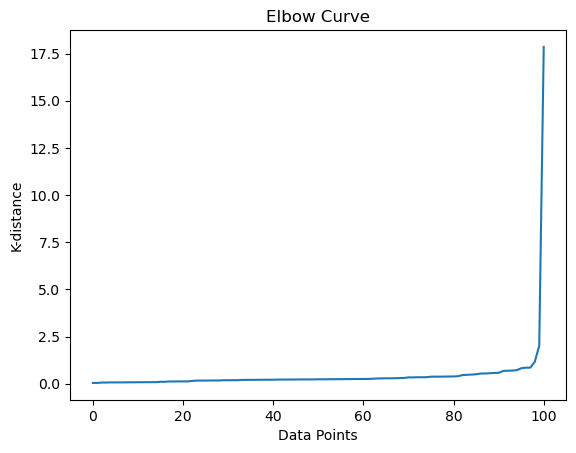

The optimal range of Epsilon is 1 to 3


In [20]:
data=np.loadtxt("Dataset3.csv",delimiter=",",dtype=str)
data=data.astype(np.float64)
# taking the input 

neighbors = (NearestNeighbors(n_neighbors=2,algorithm='auto')).fit(data)
arr=[]
arr = neighbors.kneighbors(data)
distances=arr[0]
indices=arr[1]
distances = np.sort(distances,axis=0)
distances = distances[:,1]

# plotting the Elbow curve and finding the optimal range for epsilon
plt.title("Elbow Curve")
plt.xlabel("Data Points")
plt.ylabel("K-distance")
plt.plot(distances)
plt.show()
print("The optimal range of Epsilon is 1 to 3")

In [21]:
def DBSCAN(X,Eps,Minpts):
    # Initialising Variables
    N_points=X.shape[0]
    visited = np.zeros(X.shape[0],dtype=bool)
    Cluster_labels = np.zeros(N_points,dtype=int)
    cluster_id=0
    i=0
    # Initialising the parameters
    
    def get_neighbors(data, index, Eps):
        neighbors = []
        for i in range(len(data)):
            if i != index:
                dist = np.linalg.norm(data[i]-data[index]) #calculate euclidean distance between two points
                if dist <= Eps:
                    neighbors.append(i)
        return neighbors
     # get neighbors returns the neighbors of the particular point
    
    # iterating through the data set
    while(i<N_points):
        
        if not visited[i]:
            
            visited[i] = True

            # find all neighbors of the current point
            neighbors = get_neighbors(data,i,Eps)

            if (len(neighbors) < Minpts):
                # Mark points as noise
                Cluster_labels[i]=-1
            else:
                # Expand Cluster
                cluster_id +=1
                Cluster_labels[i] = cluster_id

                # Process all neighbors of current point
                j=0
                while (j < len(neighbors)):
                    neighbor = neighbors[j]
                    if not visited[neighbor]:
                        visited[neighbor] = True

                        # find all the neighbors of this neighbor
                        new_neighbors = get_neighbors(data,neighbor,Eps)

                        if (len(new_neighbors) >= Minpts):
                            # Add new neighbors to current cluster
                            neighbors=neighbors+new_neighbors

                        # Assign CLuster ID to neighbor    
                    if (Cluster_labels[neighbor] == 0 or Cluster_labels[neighbor] == -1):
                            Cluster_labels[neighbor] = cluster_id

                    j+=1
   
        i+=1
    
    return Cluster_labels        

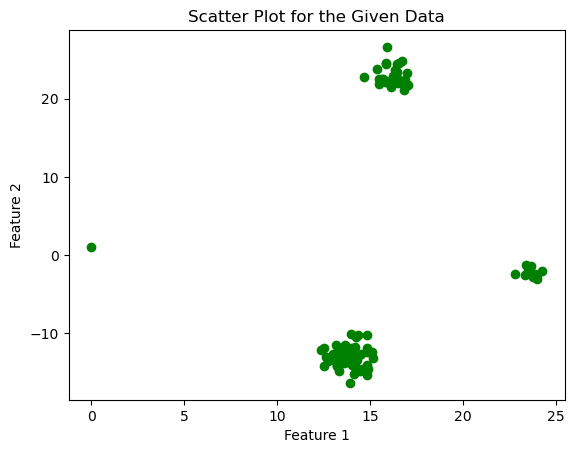

In [22]:
plt.scatter(data[:,0],data[:,1],c='green')
plt.title("Scatter Plot for the Given Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# Plotting the scatter plot

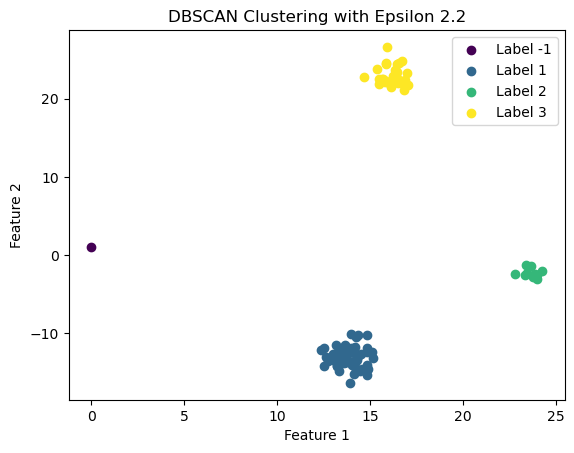

In [24]:
Cluster_labels=DBSCAN(data,2.2,15)
cmap = plt.get_cmap('viridis',len(np.unique(Cluster_labels)))

# Plotting the DBSCAN clustering of the data

for i, label in enumerate(np.unique(Cluster_labels)):
        plt.scatter(data[Cluster_labels == label, 0], data[Cluster_labels == label, 1], color=cmap(i), label=f"Label {label}")

# Add the legend and adjusting the axis labels
plt.title(f"DBSCAN Clustering with Epsilon 2.2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

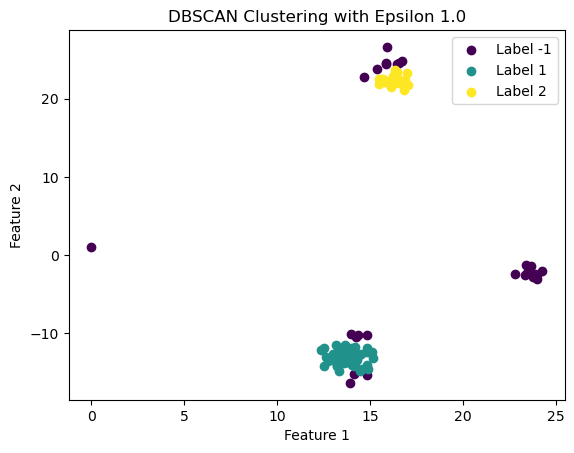

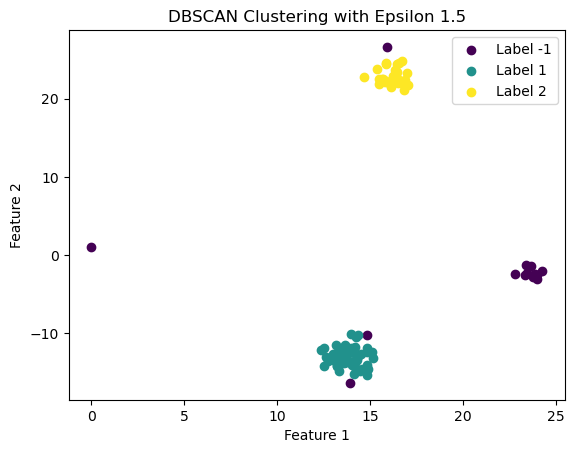

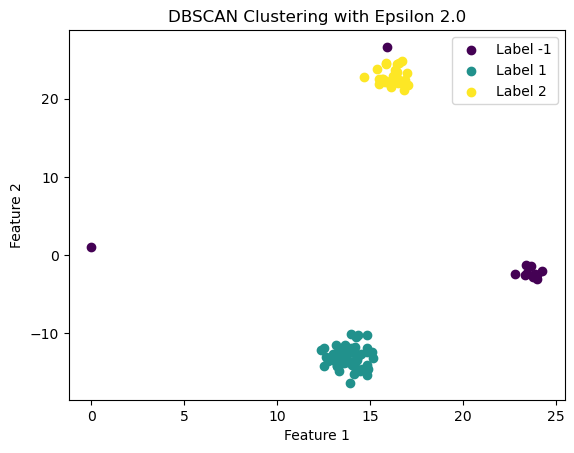

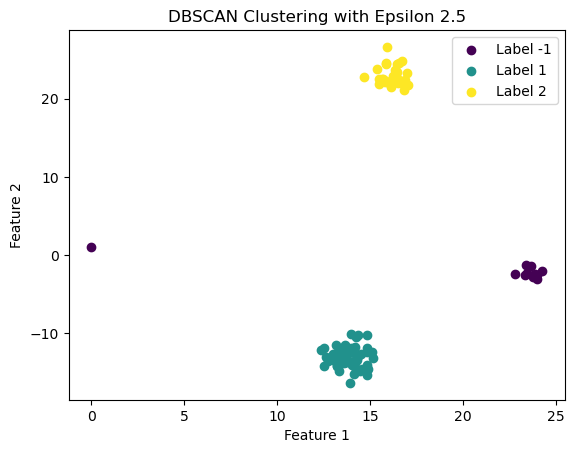

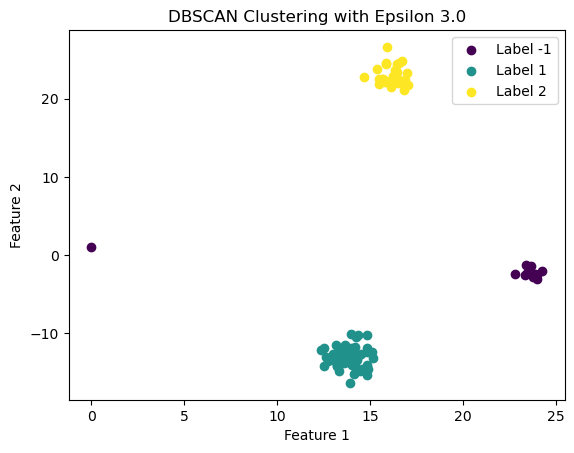

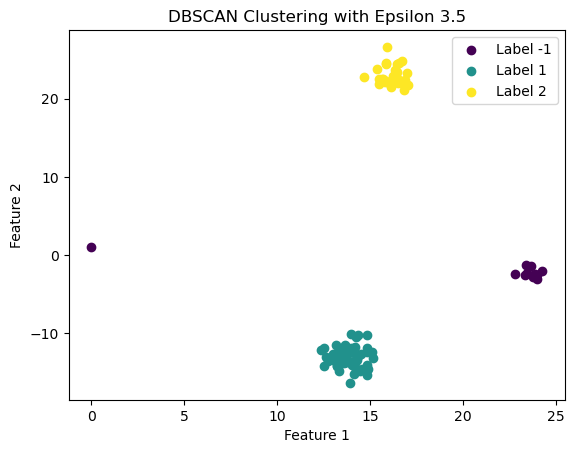

The optimal value of Epsilon which gives the best clustering is 2.2


In [9]:
Minpts = 15
# minimum points to become a core point
Eps = 0.5
# Now we will plot the graph for a range of Epsilon values from 1 to 3

for i in range(6):
    Eps = Eps + 0.5 
    Cluster_labels=DBSCAN(data,Eps,Minpts)
    cmap = plt.get_cmap('viridis',len(np.unique(Cluster_labels)))
    # Plotting the clusterings for a group of epsilon values
    
    for i, label in enumerate(np.unique(Cluster_labels)):
            plt.scatter(data[Cluster_labels == label, 0], data[Cluster_labels == label, 1], color=cmap(i),label=f"Label {label}")
    
    # Adding legends and the titles
    plt.title(f"DBSCAN Clustering with Epsilon {Eps}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
print("The optimal value of Epsilon which gives the best clustering is 2.2" )

# PART E 

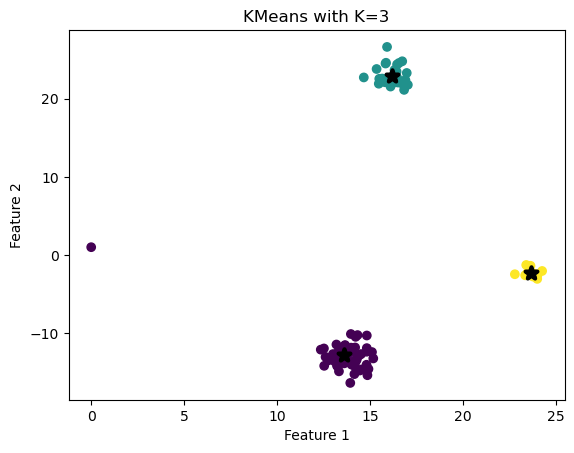

In [8]:
# Implementing the K-Means with number of clusters as 3

num_clusters = 3

k_means=KMeans(n_clusters=3)
k_means.fit(data)

centroids = k_means.cluster_centers_
labels = k_means.labels_
# Get the labels for each data point

plt.scatter(data[:,0],data[:,1],c=labels)

for i in range(num_clusters):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='*', s=80, c='k',linewidths=3)

#Plotting the Scatter plot for the dataset
plt.title("KMeans with K=3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()